In [1]:
#pip install tweepy
#pip install configparser
#pip install pandas
#pip install WordCloud
#pip install TextBlob

In [1]:
import tweepy
import configparser
import pandas as pd

#readconfigs
config = configparser.ConfigParser()
config.read('c://Users/j1007736/Downloads/config.ini')
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']
# authentication
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
print(access_token_secret)

5xMQc5YE0pxDI4dBQtF4Dq9YuCkyXjBxpFakep9pNtJvW


In [3]:
#public_tweets = api.home_timeline()
#for tweet in public_tweets:
#    print(tweet.text)
#    print(tweet.user.screen_name)

In [4]:
#columns = ['Time','User','Tweet']
#data = []
#for tweet in public_tweets:
#    data.append([tweet.created_at,tweet.user.screen_name,tweet.text])
#df = pd.DataFrame(data,columns=columns)
#df.to_csv('C://Users/j1007736/downloads/tweets.csv')

In [5]:
# user tweets by passing the user name and the cursor is required to bypass the API limit of 200 tweets per request
#users = 'veritasium'
#limit = 300
#tweets = tweepy.Cursor(api.user_timeline,screen_name=user,count=200,tweet_mode='extended').items(limit)

In [103]:
keywords = 'TATACHEMICALS'
limit = 10000
likes = []
time = []
user_name = []
user_location = []
user_verified = []
tweets = []
for i in tweepy.Cursor(api.search_tweets,q=keywords,lang="en",count=100,tweet_mode='extended').items(limit):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [104]:
df = pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})


In [105]:
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [106]:
#Clean the text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #Remove @mentions
    text = re.sub(r'#','',text) #Removing the '#' symbol
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    text = re.sub(r'RT+','',text) #Removing RT
    text = re.sub(r'https?:\/\/\s+','',text) #remove the hyper link 
    return text
def remove_Stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

#df['tweet_clean'] = df['tweets'].apply(cleanTxt)



In [107]:
df.to_csv('C://Users/j1007736/downloads/tatachem2_05022022.csv')

In [108]:
df['tweet_clean'] = df['tweets'].apply(cleanTxt)
df.head()

,tweets,likes,time,tweet_clean
0,#stockmarketupdate : Tata Chemical Share Price...,0,2022-05-02 11:32:00+00:00,stockmarketupdate : Tata Chemical Share Price ...
1,#MarketMovesWithZS:\n#TataChemicals: Profits r...,0,2022-05-02 11:31:30+00:00,MarketMovesWithZS:\nTataChemicals: Profits ros...
2,RT @WealthEnrich: Finally #tatachemicals joini...,0,2022-05-02 10:34:46+00:00,: Finally tatachemicals joining the party &amp...
3,#MarketsWithETNOW | Volume buzzers &amp; unusu...,4,2022-05-02 09:31:14+00:00,MarketsWithETNOW | Volume buzzers &amp; unusua...
4,Being Cautious. Keeping the Quantities low. US...,2,2022-05-02 09:27:45+00:00,Being Cautious. Keeping the Quantities low. US...


In [109]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['tweet_clean'].apply(getSubjectivity)
df['Polarity'] = df['tweet_clean'].apply(getPolarity)
df


,tweets,likes,time,tweet_clean,Subjectivity,Polarity
0,#stockmarketupdate : Tata Chemical Share Price...,0,2022-05-02 11:32:00+00:00,stockmarketupdate : Tata Chemical Share Price ...,0.000,0.00
1,#MarketMovesWithZS:\n#TataChemicals: Profits r...,0,2022-05-02 11:31:30+00:00,MarketMovesWithZS:\nTataChemicals: Profits ros...,0.475,0.30
2,RT @WealthEnrich: Finally #tatachemicals joini...,0,2022-05-02 10:34:46+00:00,: Finally tatachemicals joining the party &amp...,1.000,0.00
3,#MarketsWithETNOW | Volume buzzers &amp; unusu...,4,2022-05-02 09:31:14+00:00,MarketsWithETNOW | Volume buzzers &amp; unusua...,1.000,0.25
4,Being Cautious. Keeping the Quantities low. US...,2,2022-05-02 09:27:45+00:00,Being Cautious. Keeping the Quantities low. US...,0.350,-0.05
...,...,...,...,...,...,...
157,RT @Abhi4Research: Currently my best 10 :- \n\...,0,2022-04-24 04:51:54+00:00,: Currently my best 10 :- \n\nBorosilR****\nTa...,0.300,1.00
158,RT @Abhi4Research: Currently my best 10 :- \n\...,0,2022-04-24 04:48:23+00:00,: Currently my best 10 :- \n\nBorosilR****\nTa...,0.300,1.00
159,RT @Abhi4Research: Currently my best 10 :- \n\...,0,2022-04-24 03:51:28+00:00,: Currently my best 10 :- \n\nBorosilR****\nTa...,0.300,1.00
160,RT @Abhi4Research: Currently my best 10 :- \n\...,0,2022-04-24 02:47:41+00:00,: Currently my best 10 :- \n\nBorosilR****\nTa...,0.300,1.00


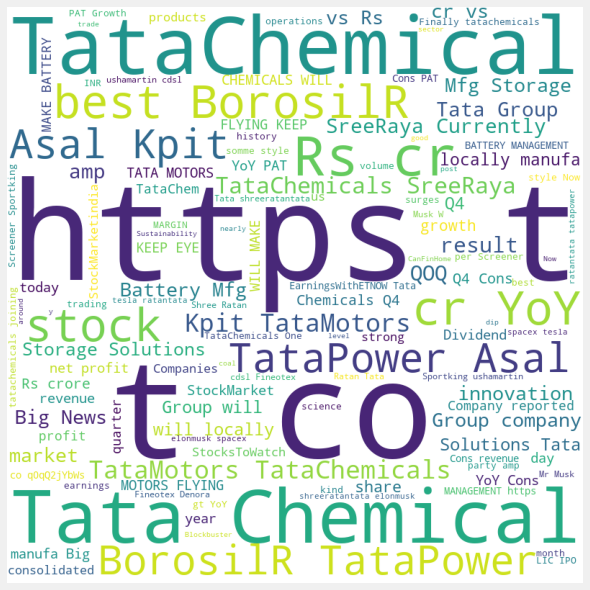

In [110]:
# Plot Word Cloud
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in df['tweet_clean']])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(allWords)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [111]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweets']
round((ptweets.shape[0] / df.shape[0])*100,1)

42.0

In [112]:
#Get the  percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweets']
round((ntweets.shape[0] / df.shape[0])*100,1)

4.9

In [113]:
#Get the  percentage of negative tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['tweets']
round((ntweets.shape[0] / df.shape[0])*100,1)

53.1

In [114]:
#Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+')'+sortedDF['tweets'][i])
        print()
        j = j+1

1)#MarketMovesWithZS:
#TataChemicals: Profits rose to ₹438.2 crores vs ₹11.7 crores y/y
#HDFC: Net profit rises 16%, NII soars 14% y/y
#Wipro: Co. expects a 1-3% sequential growth in Q1FY23 revenue. Profits grew by 3.98% q/q
Source: News18 https://t.co/Nb2YPEg2Xx

2)#MarketsWithETNOW | Volume buzzers &amp; unusual movers in trade today! @JayeshKhilnani is here with the list 

#CanFinHomes #TataChemicals #SolaraActive #StocksToWatch #StockMarketIndia https://t.co/XZDPwpXOTc

3)@TataChemicals trades jubilantly on reporting many fold jump in Q4 consolidated net profit

https://t.co/FZ65pHvvAI

#StockMarket #QuarterlyResult #TataChemicals #ChemicalsSector #Investmentguruindia https://t.co/7ZlklWi7iU

4)RT @SoumenduM: Tatachem giving a stellar run in todays trade. Up by nearly 10% #tatachemicals #TataChem #Tatachemical #Stocks #StockMarketi…

5)Shares of Tata Chemicals surged more than 11 percent in trade on May 2 buoyed by better than expected March quarter results

@Nishantopines #StockMa

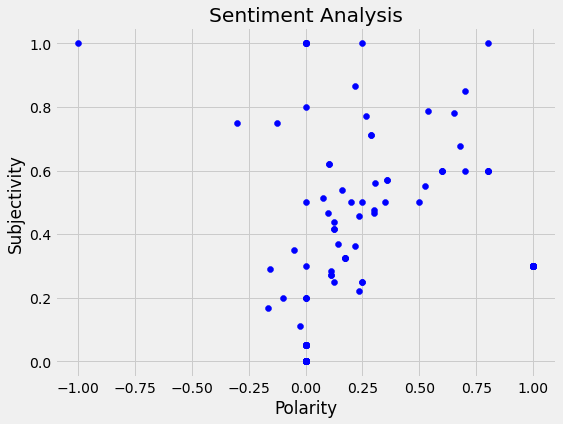

In [115]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
#Get the  percentage of positive tweets
#ptweets = df[df.Analysis == 'Positive']
#ptweets = ptweets['tweets']
#round((ptweets.shape[0] / df.shape[0])*100,1)

NameError: name 'sortedDF' is not defined

In [14]:
#Get the  percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweets']
round((ntweets.shape[0] / df.shape[0])*100,1)

AttributeError: 'DataFrame' object has no attribute 'Analysis'

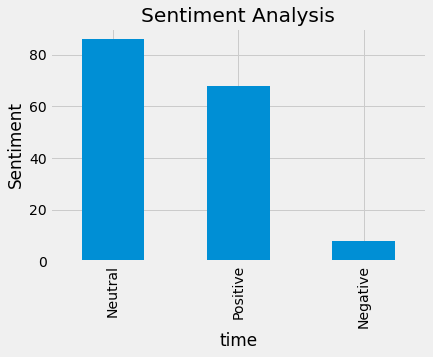

In [116]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xlabel('time')
plt.ylabel('Sentiment')
df['Analysis'].value_counts().plot(kind='bar')

#df.plot(x="time", y="Subjectivity", kind="line", figsize=(9, 8))
plt.show()

Positive    28
Neutral      6
Negative     2
Name: Analysis, dtype: int64


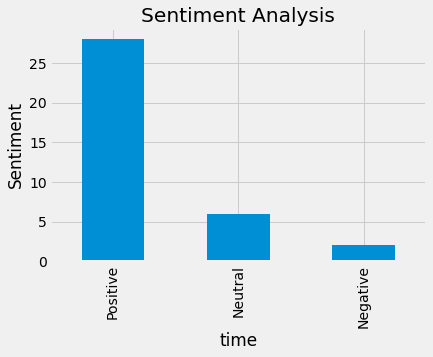

In [117]:
newdf_1 = df[df['time'] <= '2022-04-29']
TotalCount1 = newdf_1['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xlabel('time')
plt.ylabel('Sentiment')
#newdf_1['Analysis'].value_counts().plot(kind='bar')
newdf_1['Analysis'].value_counts().plot(kind='bar')
print(TotalCount1)

Neutral     29
Positive    28
Negative     6
Name: Analysis, dtype: int64


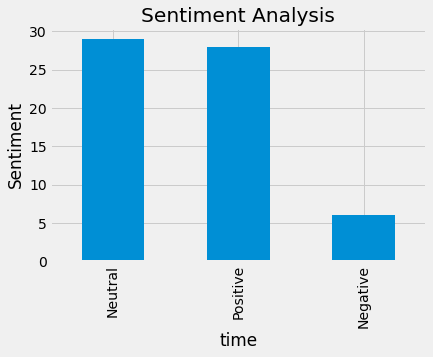

In [118]:
newdf_2 = df[df['time'] >= '2022-05-01']
TotalCount2 = newdf_2['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xlabel('time')
plt.ylabel('Sentiment')
#newdf_1['Analysis'].value_counts().plot(kind='bar')
newdf_2['Analysis'].value_counts().plot(kind='bar')
print(TotalCount2)

In [ ]:
import nltk
#nltk.download()
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

In [ ]:
newdf_1 = df[df['time'] <= '2022-04-24']
TotalCount1 = newdf_1['Analysis'].value_counts()
print(TotalCount1)

newdf_2 = df[df['time'] <= '2022-04-23']
TotalCount2 = newdf_2['Analysis'].value_counts()
print(TotalCount2)

newdf_3 = df[df['time'] <= '2022-04-22']
TotalCount3 = newdf_3['Analysis'].value_counts()
print(TotalCount3)